In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
data=pd.read_csv("/content/heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,130,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
Data=pd.get_dummies(data)
Data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,130,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
clean_data = Data.copy()
y=clean_data[['HeartDisease']].copy()
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [ ]:
clean_data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up']

In [ ]:
x = clean_data[features].copy()
x.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
y.columns

Index(['HeartDisease'], dtype='object')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=324)

In [ ]:
y_train.shape

(615, 1)

In [ ]:
y_test.shape

(303, 1)

In [ ]:
diesease_classifier = DecisionTreeClassifier(max_leaf_nodes=12,random_state=0,max_depth=8)
diesease_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=12, random_state=0)

In [ ]:
type(diesease_classifier)

sklearn.tree._classes.DecisionTreeClassifier

In [ ]:
y_predicted = diesease_classifier.predict(X_test)

In [ ]:
y_predicted[:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [ ]:
y_test['HeartDisease'][:10]

553    1
515    0
828    1
670    0
487    1
510    0
745    1
471    1
459    0
400    1
Name: HeartDisease, dtype: int64

In [ ]:
accuracy_score(y_test,y_predicted)*100

86.13861386138613

In [ ]:
diesease_classifier = DecisionTreeClassifier(max_leaf_nodes=10,random_state=0,max_depth=6)
diesease_classifier.fit(X_train,y_train)
y_predicted = diesease_classifier.predict(X_test)
accuracy_score(y_test,y_predicted)*100

85.8085808580858

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn import tree
diesease_classifier = tree.DecisionTreeClassifier(max_leaf_nodes=12,random_state=0,max_depth=8)
iris = load_iris()
diesease_classifier=diesease_classifier.fit(X_train,y_train)


[Text(0.38333333333333336, 0.9166666666666666, 'x[19] <= 0.5\ngini = 0.495\nsamples = 615\nvalue = [278, 337]'),
 Text(0.2, 0.75, 'x[8] <= 0.5\ngini = 0.298\nsamples = 341\nvalue = [62, 279]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[7] <= 0.5\ngini = 0.478\nsamples = 106\nvalue = [42, 64]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.365\nsamples = 25\nvalue = [19, 6]'),
 Text(0.2, 0.4166666666666667, 'x[4] <= 143.5\ngini = 0.407\nsamples = 81\nvalue = [23, 58]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.206\nsamples = 43\nvalue = [5, 38]'),
 Text(0.26666666666666666, 0.25, 'x[1] <= 131.0\ngini = 0.499\nsamples = 38\nvalue = [18, 20]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.477\nsamples = 28\nvalue = [17, 11]'),
 Text(0.3333333333333333, 0.08333333333333333, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.26666666666666666, 0.5833333333333334, 'gini = 0.156\nsamples = 235\nvalue = [20, 215]'),
 Text(0.5666666666666667, 0.75, 'x[8] <= 0.5\ngini = 0.3

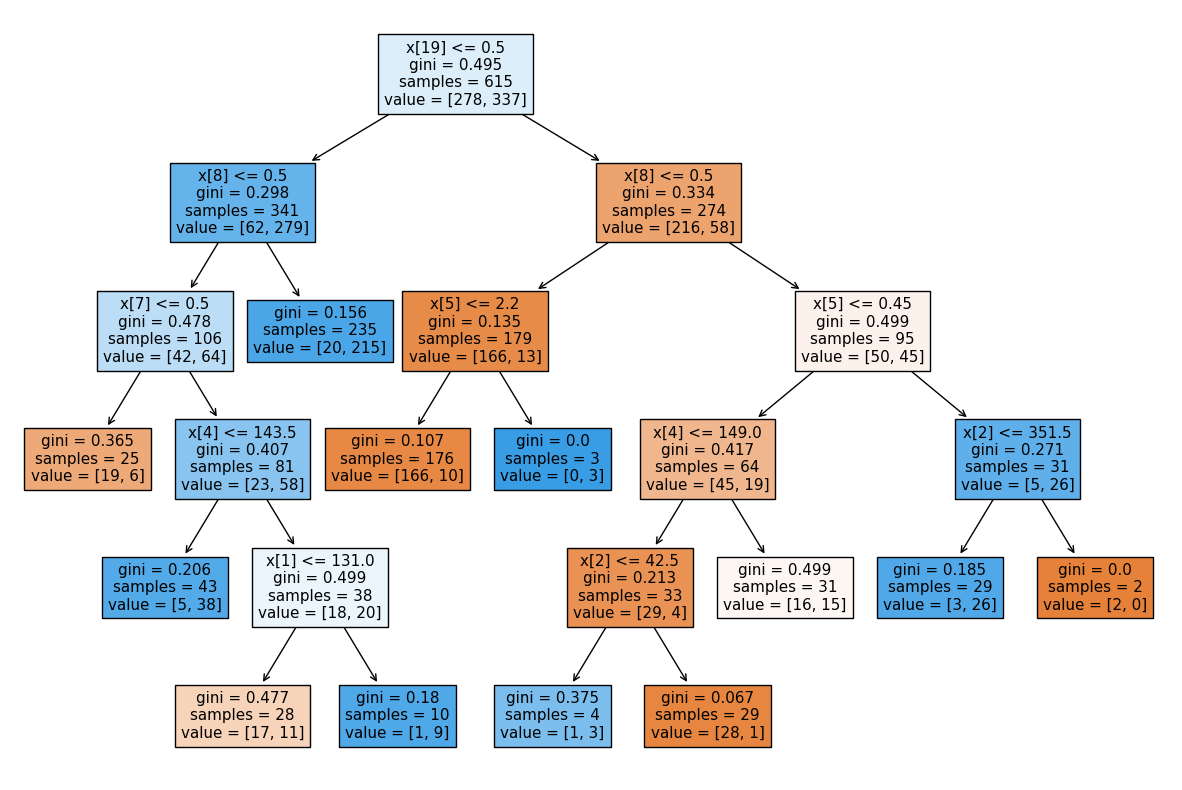

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(diesease_classifier,filled=True)